In [2]:
import json
import pandas as pd

f = open('transaction-data-adhoc-analysis.json')

data = json.load(f)

f.close()

In [4]:
#Get the catalog list
singles = []
rate = []
for z in range(len(data)):
    if len(list(data[z]["transaction_items"].split(";")))==1:
        b = data[z]["transaction_items"].split(";")
        times = b[0][len(b[0])-2]
        if times == "1":
            singles.append(data[z]["transaction_items"][:-5])
            rate.append(data[z]["transaction_value"])
        else:
            continue
    else:
        continue

pricelist = []

#Merge lists, convert to dataframe
for c in range(len(singles)):
    pricelist.append([singles[c],rate[c]])
    
pricetable = pd.DataFrame(pricelist,columns=['Item','Price'])

catalog = pricetable.drop_duplicates()
catalog


,Item,Price
0,"HealthyKid 3+,Yummy Vegetables",500
1,"Candy City,Gummy Worms",150
2,"Exotic Extras,Beef Chicharon",1299
3,"Exotic Extras,Kimchi and Seaweed",799
5,"Candy City,Orange Beans",199
11,"HealthyKid 3+,Gummy Vitamins",1500
13,"HealthyKid 3+,Nutrional Milk",1990


In [5]:
#Convert df to dict for easier referencing
catalog["Item"]
menu = catalog.to_dict()
pricekey = menu ["Price"].values()
itemkey = menu ["Item"].values()


In [6]:
#Customer function
name = []
for j in range(len(data)):
    raw_name = data[j]["name"]
    y = data[j]["transaction_items"].split(";")
    for i in range(len(y)):
        aw = len(y[i])-2
        fin = int(y[i][aw])
        for k in range(fin):
            name.append(raw_name)
#Email function
email = []
for j in range(len(data)):
    raw_email = data[j]["mail"]
    y = data[j]["transaction_items"].split(";")
    for i in range(len(y)):
        aw = len(y[i])-2
        fin = int(y[i][aw])
        for k in range(fin):
            email.append(raw_email)
#Item function
item = []
for j in range(len(data)):
    y = data[j]["transaction_items"].split(";")
    for i in range(len(y)):
        aw = len(y[i])-2
        fin = int(y[i][aw])
        ex = [y[i][:-5]]
        item += ex*fin
#Month function
month = []
for j in range(len(data)):
    y = data[j]["transaction_items"].split(";")
    dday = data[j]["transaction_date"]
    loc1 = len(dday)-5
    loc2 = len(dday)-4
    raw_month = dday[loc1] + dday[loc2]
    for i in range(len(y)):
        aw = len(y[i])-2
        fin = int(y[i][aw])
        for k in range(fin):
            month.append(raw_month)
#Cost function
cost = []
for j in range(len(item)):
    item_num = list(itemkey).index(item[j])
    item_cost = list(pricekey)[item_num]
    cost.append(item_cost)
    
#FINALLY
main = []
#Merge lists, convert to dataframe
for e in range(len(item)):
    main.append([name[e],email[e],item[e],month[e],cost[e]])
    
#catalog = pricetable.drop_duplicates()
main_df = pd.DataFrame(main,columns=["Customer","Email","Item","Month","Cost"])
main_df

,Customer,Email,Item,Month,Cost
0,Jennifer Campbell,watsonbrenda@gmail.com,"Exotic Extras,Beef Chicharon",01,1299
1,Jennifer Campbell,watsonbrenda@gmail.com,"Exotic Extras,Beef Chicharon",01,1299
2,Jennifer Campbell,watsonbrenda@gmail.com,"Exotic Extras,Beef Chicharon",01,1299
3,Jennifer Campbell,watsonbrenda@gmail.com,"Exotic Extras,Beef Chicharon",01,1299
4,Melissa Kim,moorelisa@gmail.com,"Exotic Extras,Beef Chicharon",01,1299
...,...,...,...,...,...
415145,Stephanie Russell,xjones@hotmail.com,"HealthyKid 3+,Nutrional Milk",06,1990
415146,Stephanie Russell,xjones@hotmail.com,"Candy City,Gummy Worms",06,150
415147,Stephanie Russell,xjones@hotmail.com,"Candy City,Gummy Worms",06,150
415148,Stephanie Russell,xjones@hotmail.com,"Candy City,Gummy Worms",06,150


In [7]:
tableone = []
for f in range(len(itemkey)):
    find = main_df.loc[:,"Item"] == list(itemkey)[f]
    sold1 = main_df.loc[find & (main_df.loc[:,"Month"]=="01"),:]
    sold2 = main_df.loc[find & (main_df.loc[:,"Month"]=="02"),:]
    sold3 = main_df.loc[find & (main_df.loc[:,"Month"]=="03"),:]
    sold4 = main_df.loc[find & (main_df.loc[:,"Month"]=="04"),:]
    sold5 = main_df.loc[find & (main_df.loc[:,"Month"]=="05"),:]
    sold6 = main_df.loc[find & (main_df.loc[:,"Month"]=="06"),:]
    sales1 = len(sold1)*list(pricekey)[f]
    sales2 = len(sold2)*list(pricekey)[f]
    sales3 = len(sold3)*list(pricekey)[f]
    sales4 = len(sold4)*list(pricekey)[f]
    sales5 = len(sold5)*list(pricekey)[f]
    sales6 = len(sold6)*list(pricekey)[f]
    totalsold = len(sold1)+len(sold2)+len(sold3)+len(sold4)+len(sold5)+len(sold6)
    totalsales = sales1+sales2+sales3+sales4+sales5+sales6
    
    tableone.append([list(itemkey)[f],len(sold1),len(sold2),len(sold3),len(sold4),len(sold5),
                     len(sold6),totalsold,sales1,sales2,sales3,sales4,sales5,sales6,totalsales])
prod_df = pd.DataFrame(tableone,columns=["Item Type","Items Sold (JAN)","Items Sold (FEB)","Items Sold (MAR)","Items Sold (APR)","Items Sold (MAY)",
                                         "Items Sold (JUN)","Total Items Sold","Item Sales (JAN)","Item Sales (FEB)","Item Sales (MAR)","Item Sales (APR)",
                                         "Item Sales (MAY)","Item Sales (JUN)","Total Sales Value"])                                   
prod_df

,Item Type,Items Sold (JAN),Items Sold (FEB),Items Sold (MAR),Items Sold (APR),Items Sold (MAY),Items Sold (JUN),Total Items Sold,Item Sales (JAN),Item Sales (FEB),Item Sales (MAR),Item Sales (APR),Item Sales (MAY),Item Sales (JUN),Total Sales Value
0,"HealthyKid 3+,Yummy Vegetables",9959,10256,9896,9861,9735,9722,59429,4979500,5128000,4948000,4930500,4867500,4861000,29714500
1,"Candy City,Gummy Worms",9559,9996,9986,10043,9801,9934,59319,1433850,1499400,1497900,1506450,1470150,1490100,8897850
2,"Exotic Extras,Beef Chicharon",9665,10001,9816,9890,10028,9902,59302,12554835,12991299,12750984,12847110,13026372,12862698,77033298
3,"Exotic Extras,Kimchi and Seaweed",9676,9949,9967,9921,9773,10104,59390,7731124,7949251,7963633,7926879,7808627,8073096,47452610
4,"Candy City,Orange Beans",9774,10037,9611,9914,9964,10106,59406,1945026,1997363,1912589,1972886,1982836,2011094,11821794
5,"HealthyKid 3+,Gummy Vitamins",9681,9980,10145,9842,9948,9980,59576,14521500,14970000,15217500,14763000,14922000,14970000,89364000
6,"HealthyKid 3+,Nutrional Milk",9727,9691,9876,9786,9881,9767,58728,19356730,19285090,19653240,19474140,19663190,19436330,116868720


In [8]:
#Partial data to compare sales, can be used for making graphs
prod_df[["Item Type","Total Items Sold","Total Sales Value"]]

,Item Type,Total Items Sold,Total Sales Value
0,"HealthyKid 3+,Yummy Vegetables",59429,29714500
1,"Candy City,Gummy Worms",59319,8897850
2,"Exotic Extras,Beef Chicharon",59302,77033298
3,"Exotic Extras,Kimchi and Seaweed",59390,47452610
4,"Candy City,Orange Beans",59406,11821794
5,"HealthyKid 3+,Gummy Vitamins",59576,89364000
6,"HealthyKid 3+,Nutrional Milk",58728,116868720


In [9]:
clientlog = main_df[["Customer","Month"]]
clientlog

,Customer,Month
0,Jennifer Campbell,01
1,Jennifer Campbell,01
2,Jennifer Campbell,01
3,Jennifer Campbell,01
4,Melissa Kim,01
...,...,...
415145,Stephanie Russell,06
415146,Stephanie Russell,06
415147,Stephanie Russell,06
415148,Stephanie Russell,06


In [10]:
#Total num of clients
len(clientlog["Customer"].unique())
len(clientlog)

clientdict = clientlog.to_dict()

clientlist = []
for k in range(len(clientlog)):
    clientlist.append((name[k],month[k]))
cmon = tuple(clientlist)
unique_client = pd.unique(cmon).tolist()


In [11]:
#solve for repeaters, engagers, and first timers
rep1 = 0 
client1 = [] 
fir1 = 0 
eng1 = 0

rep2 = 0
client2 = []
fir2 = 0
eng2 = 0

rep3 = 0
client3 = []
fir3 = 0
eng3 = 0

rep4 = 0 
client4 = [] 
fir4 = 0 
eng4 = 0

rep5 = 0
client5 = []
fir5 = 0
eng5 = 0

rep6 = 0
client6 = []
fir6 = 0
eng6 = 0

for l in range(len(unique_client)):
    if unique_client[l][1] == "01":
        eng1 += 1
        fir1 += 1
        client1.append(unique_client[l][0])
    elif unique_client[l][1] == "02":
        if (unique_client[l][0]) in client1:
            rep2 += 1
            eng2 += 1
        elif (unique_client[l][0]) not in client1:
            fir2 += 1
        client2.append(unique_client[l][0])
    elif unique_client[l][1] == "03":
        if (unique_client[l][0]) in client2:
            rep3 += 1
            if (unique_client[l][0]) in client1:
                eng3 +=1
        elif (unique_client[l][0]) not in (client1 + client2):
            fir3 +=1
        client3.append(unique_client[l][0])
    elif unique_client[l][1] == "04":
        if (unique_client[l][0]) in client3:
            rep4 += 1
            if (unique_client[l][0]) in client2 and (unique_client[l][0]) in client1:
                eng4 +=1
        elif (unique_client[l][0]) not in (client1 + client2 + client3):
            fir4 +=1
        client4.append(unique_client[l][0])
    elif unique_client[l][1] == "05":
        if (unique_client[l][0]) in client4:
            rep5 += 1
            if (unique_client[l][0]) in client3 and (unique_client[l][0]) in client2 and (unique_client[l][0]) in client1:
                eng5 +=1
        elif (unique_client[l][0]) not in (client1 + client2 + client3 + client4):
            fir5 +=1
        client5.append(unique_client[l][0])
    elif unique_client[l][1] == "06":
        if (unique_client[l][0]) in client5:
            rep6 += 1
            if (unique_client[l][0]) in client4 and (unique_client[l][0]) in client3 and (unique_client[l][0]) in client2 and (unique_client[l][0]) in client1:
                eng6 +=1
            elif (unique_client[l][0]) not in (client1 + client2 + client3 + client4 + client5):
                fir6 +=1
        client6.append(unique_client[l][0])


In [12]:
#Solve for inactives
ina1 = []
ina2 = []
ina3 = []
ina4 = []
ina5 = []
ina6 = []
for i in client1:
    if i not in client2:
        ina2.append(i)       
for i in set(client1 + client2):
    if i not in client3:
        ina3.append(i)
for i in set(client1 + client2 + client3):
    if i not in client4:
        ina4.append(i)        
for i in set(client1 + client2 + client3 + client4):
    if i not in client5:
        ina5.append(i)        
for i in set(client1 + client2 + client3 + client4 + client5):
    if i not in client6:
        ina6.append(i)      


In [13]:
clients = [["Repeaters",rep1,rep2,rep3,rep4,rep5,rep6],["Inactive",len(ina1),len(ina2),len(ina3),len(ina4),len(ina5),len(ina6)],
           ["Engaged",eng1,eng2,eng3,eng4,eng5,eng6],["New",fir1,fir2,fir3,fir4,fir5,fir6]]
                    
client_df = pd.DataFrame(clients,columns=["Metrics","JAN","FEB","MAR","APR","MAY","JUN"])
client_df

,Metrics,JAN,FEB,MAR,APR,MAY,JUN
0,Repeaters,0,5172,5216,5154,5110,5193
1,Inactive,0,1416,1747,1909,1917,1835
2,Engaged,6588,5172,4126,3289,2667,2190
3,New,6588,1459,322,96,20,0


In [18]:
#CHARTPLOT TIME!!
totalsales = prod_df[["Item Type","Total Items Sold","Total Sales Value"]]
totalsales

,Item Type,Total Items Sold,Total Sales Value
0,"HealthyKid 3+,Yummy Vegetables",59429,29714500
1,"Candy City,Gummy Worms",59319,8897850
2,"Exotic Extras,Beef Chicharon",59302,77033298
3,"Exotic Extras,Kimchi and Seaweed",59390,47452610
4,"Candy City,Orange Beans",59406,11821794
5,"HealthyKid 3+,Gummy Vitamins",59576,89364000
6,"HealthyKid 3+,Nutrional Milk",58728,116868720


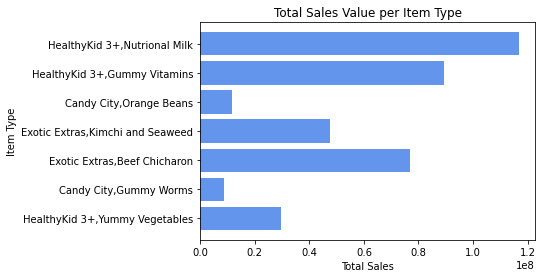

In [154]:
#Total Sales Value per Item Type (bar)
import matplotlib.pyplot as plt
%matplotlib inline

plt.barh(y=totalsales["Item Type"], width=totalsales["Total Sales Value"], color='cornflowerblue')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.title('Total Sales Value per Item Type')
plt.show()

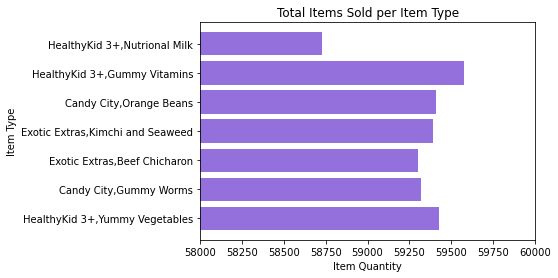

In [153]:
#Total Items Sold per Item Type (bar)
plt.barh(y=totalsales["Item Type"], width=totalsales["Total Items Sold"], color='mediumpurple')
plt.xlabel('Item Quantity')
plt.ylabel('Item Type')
plt.xlim([58000,60000])
plt.title('Total Items Sold per Item Type')
plt.show()

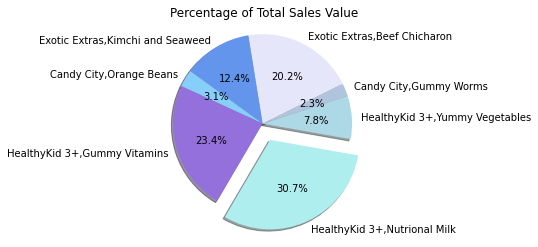

In [91]:
#Percentage of Total Sales (pie)

bigsales = sum(totalsales["Total Sales Value"])

percent_list = []
for n in range(len(totalsales["Total Sales Value"])):
    percent = totalsales["Total Sales Value"][n]/bigsales
    percent_list.append(percent)

colors= ['lightblue','lightsteelblue','lavender','cornflowerblue','lightskyblue','mediumpurple','paleturquoise']
explode = (0,0,0,0,0,0,0.2)
plt.pie(percent_list, labels=totalsales["Item Type"], autopct='%1.1f%%', startangle=-10, shadow=True, colors=colors, explode=explode)
plt.title('Percentage of Total Sales Value')
plt.axis('equal')
plt.show()

In [140]:
client_df

,Metrics,JAN,FEB,MAR,APR,MAY,JUN
0,Repeaters,0,5172,5216,5154,5110,5193
1,Inactive,0,1416,1747,1909,1917,1835
2,Engaged,6588,5172,4126,3289,2667,2190
3,New,6588,1459,322,96,20,0


Text(0.5, 1.0, 'Monthly Customer Metrics')

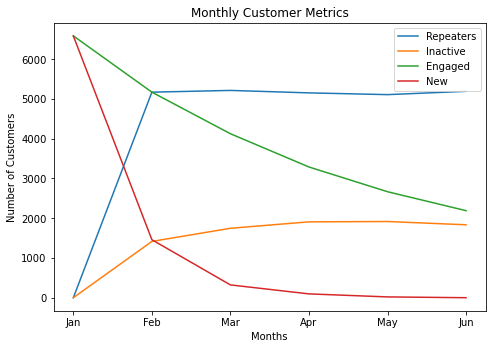

In [150]:
#Item Sales per month (lines with legend)

monthx = ['Jan','Feb','Mar','Apr','May','Jun']
met1 = []
met2 = []
met3 = []
met4 = []
for p in range(len(client_df)):
    if p == 0:
        met1.append(client_df["JAN"][p])
        met1.append(client_df["FEB"][p])
        met1.append(client_df["MAR"][p])
        met1.append(client_df["APR"][p])
        met1.append(client_df["MAY"][p])
        met1.append(client_df["JUN"][p]) 
    elif p == 1:
        met2.append(client_df["JAN"][p])
        met2.append(client_df["FEB"][p])
        met2.append(client_df["MAR"][p])
        met2.append(client_df["APR"][p])
        met2.append(client_df["MAY"][p])
        met2.append(client_df["JUN"][p])
    elif p == 2:
        met3.append(client_df["JAN"][p])
        met3.append(client_df["FEB"][p])
        met3.append(client_df["MAR"][p])
        met3.append(client_df["APR"][p])
        met3.append(client_df["MAY"][p])
        met3.append(client_df["JUN"][p])
    elif p == 3:
        met4.append(client_df["JAN"][p])
        met4.append(client_df["FEB"][p])
        met4.append(client_df["MAR"][p])
        met4.append(client_df["APR"][p])
        met4.append(client_df["MAY"][p])
        met4.append(client_df["JUN"][p])
        
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(monthx, met1, label=str(client_df["Metrics"][0]))
ax.plot(monthx, met2, label=str(client_df["Metrics"][1]))
ax.plot(monthx, met3, label=str(client_df["Metrics"][2]))
ax.plot(monthx, met4, label=str(client_df["Metrics"][3]))
ax.legend(loc=0)
plt.xlabel("Months")
plt.ylabel("Number of Customers")
plt.title("Monthly Customer Metrics")

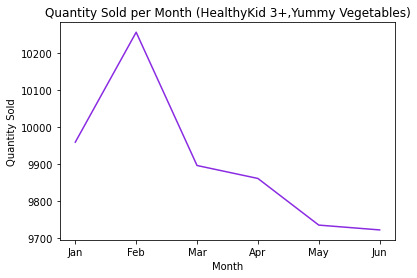

In [151]:
x = totalsales["Item Type"]
y = totalsales["Total Sales Value"]

pro1 = []
for o in range(len(prod_df)):
    if o == 0:
        pro1.append(prod_df["Items Sold (JAN)"][o])
        pro1.append(prod_df["Items Sold (FEB)"][o])
        pro1.append(prod_df["Items Sold (MAR)"][o])
        pro1.append(prod_df["Items Sold (APR)"][o])
        pro1.append(prod_df["Items Sold (MAY)"][o])
        pro1.append(prod_df["Items Sold (JUN)"][o])
        
plt.plot(monthx,pro1,'blueviolet')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Month ('+str(totalsales["Item Type"][0]+')'))
plt.show()

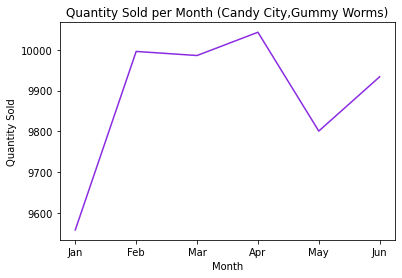

In [126]:
pro2 = []
for o in range(len(prod_df)):
    if o == 1:
        pro2.append(prod_df["Items Sold (JAN)"][o])
        pro2.append(prod_df["Items Sold (FEB)"][o])
        pro2.append(prod_df["Items Sold (MAR)"][o])
        pro2.append(prod_df["Items Sold (APR)"][o])
        pro2.append(prod_df["Items Sold (MAY)"][o])
        pro2.append(prod_df["Items Sold (JUN)"][o])

plt.plot(monthx,pro2,'blueviolet')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Month ('+str(totalsales["Item Type"][1]+')'))
plt.show()

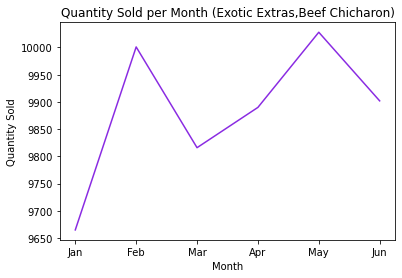

In [127]:
pro3 = []
for o in range(len(prod_df)):
    if o == 2:
        pro3.append(prod_df["Items Sold (JAN)"][o])
        pro3.append(prod_df["Items Sold (FEB)"][o])
        pro3.append(prod_df["Items Sold (MAR)"][o])
        pro3.append(prod_df["Items Sold (APR)"][o])
        pro3.append(prod_df["Items Sold (MAY)"][o])
        pro3.append(prod_df["Items Sold (JUN)"][o])

plt.plot(monthx,pro3,'blueviolet')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Month ('+str(totalsales["Item Type"][2]+')'))
plt.show()

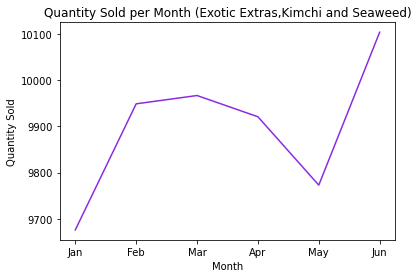

In [128]:
pro4 = []
for o in range(len(prod_df)):
    if o == 3:
        pro4.append(prod_df["Items Sold (JAN)"][o])
        pro4.append(prod_df["Items Sold (FEB)"][o])
        pro4.append(prod_df["Items Sold (MAR)"][o])
        pro4.append(prod_df["Items Sold (APR)"][o])
        pro4.append(prod_df["Items Sold (MAY)"][o])
        pro4.append(prod_df["Items Sold (JUN)"][o])

plt.plot(monthx,pro4,'blueviolet')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Month ('+str(totalsales["Item Type"][3]+')'))
plt.show()

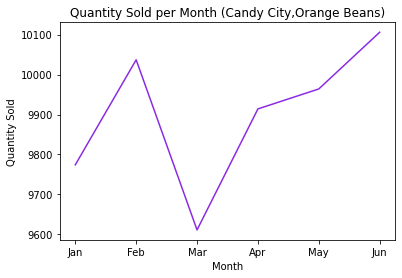

In [129]:
pro5 = []
for o in range(len(prod_df)):
    if o == 4:
        pro5.append(prod_df["Items Sold (JAN)"][o])
        pro5.append(prod_df["Items Sold (FEB)"][o])
        pro5.append(prod_df["Items Sold (MAR)"][o])
        pro5.append(prod_df["Items Sold (APR)"][o])
        pro5.append(prod_df["Items Sold (MAY)"][o])
        pro5.append(prod_df["Items Sold (JUN)"][o])

plt.plot(monthx,pro5,'blueviolet')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Month ('+str(totalsales["Item Type"][4]+')'))
plt.show()

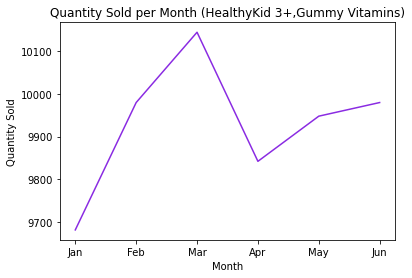

In [130]:
pro6 = []
for o in range(len(prod_df)):
    if o == 5:
        pro6.append(prod_df["Items Sold (JAN)"][o])
        pro6.append(prod_df["Items Sold (FEB)"][o])
        pro6.append(prod_df["Items Sold (MAR)"][o])
        pro6.append(prod_df["Items Sold (APR)"][o])
        pro6.append(prod_df["Items Sold (MAY)"][o])
        pro6.append(prod_df["Items Sold (JUN)"][o])

plt.plot(monthx,pro6,'blueviolet')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Month ('+str(totalsales["Item Type"][5]+')'))
plt.show()

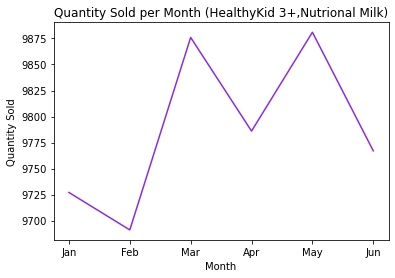

In [132]:
pro7 = []
for o in range(len(prod_df)):
    if o == 6:
        pro7.append(prod_df["Items Sold (JAN)"][o])
        pro7.append(prod_df["Items Sold (FEB)"][o])
        pro7.append(prod_df["Items Sold (MAR)"][o])
        pro7.append(prod_df["Items Sold (APR)"][o])
        pro7.append(prod_df["Items Sold (MAY)"][o])
        pro7
        .append(prod_df["Items Sold (JUN)"][o])

plt.plot(monthx,pro7,'blueviolet')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Month ('+str(totalsales["Item Type"][6]+')'))
plt.show()